# Considering Detection of Outliers 

## Understanding outlier basics

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

import numpy as np
from scipy.stats.stats import pearsonr
np.random.seed(101)
normal = np.random.normal(loc=0.0, scale= 1.0, size=1000)
print('Mean: %0.3f Median: %0.3f Variance: %0.3f' %
                                  (np.mean(normal), 
                                   np.median(normal), 
                                   np.var(normal)))

Mean: 0.026 Median: 0.032 Variance: 1.109


In [2]:
outlying = normal.copy()
outlying[0] = 50.0
print('Mean: %0.3f Median: %0.3f Variance: %0.3f' %
                                (np.mean(outlying), 
                                 np.median(outlying),   
                                 np.var(outlying)))

print('Pearson''s correlation: %0.3f p-value: %0.3f' % 
                            pearsonr(normal,outlying))

Mean: 0.074 Median: 0.032 Variance: 3.597
Pearsons correlation: 0.619 p-value: 0.000


# Examining a Simple Univariate Method

## Using the pandas package

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X,y = diabetes.data, diabetes.target

In [4]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


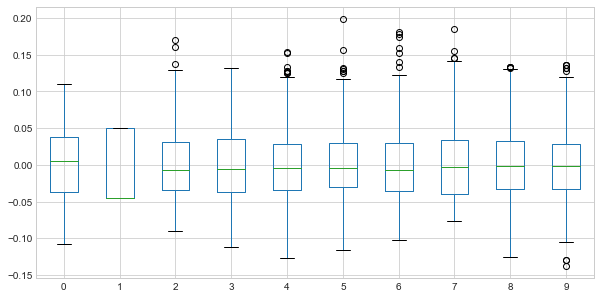

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=1, 
                         figsize=(10, 5))
df.boxplot(ax=axes);

## Leveraging the Gaussian distribution

In [6]:
from sklearn.preprocessing import StandardScaler
Xs = StandardScaler().fit_transform(X)
# .any(1) method will avoid duplicating 
df[(np.abs(Xs)>3).any(1)]

,0,1,2,3,4,5,6,7,8,9
58,0.04,-0.04,-0.06,0.04,0.01,-0.06,0.18,-0.08,-0.00,-0.05
123,0.01,0.05,0.03,-0.00,0.15,0.20,-0.06,0.19,0.02,0.07
216,0.01,0.05,0.04,0.05,0.05,0.07,-0.07,0.15,0.05,0.05
230,-0.04,0.05,0.07,-0.06,0.15,0.16,0.00,0.07,0.05,0.07
256,-0.05,-0.04,0.16,-0.05,-0.03,-0.02,-0.05,0.03,0.03,0.01
260,0.04,-0.04,-0.01,-0.06,0.01,-0.03,0.15,-0.08,-0.08,-0.02
261,0.05,-0.04,-0.04,0.10,0.04,-0.03,0.18,-0.08,-0.01,0.02
269,0.01,-0.04,-0.03,-0.03,0.04,-0.01,0.16,-0.08,-0.01,-0.04
322,0.02,0.05,0.06,0.06,0.02,-0.04,-0.09,0.16,0.13,0.08
336,-0.02,-0.04,0.09,-0.04,0.09,0.09,-0.06,0.15,0.08,0.05


## Making assumptions and checking out

In [7]:
Xs_capped = Xs.copy()
o_idx = np.where(np.abs(Xs)>3)
Xs_capped[o_idx] = np.sign(Xs[o_idx]) * 3

In [8]:
from scipy.stats.mstats import winsorize
Xs_winsorized = winsorize(Xs, limits=(0.05, 0.95))

In [9]:
from sklearn.preprocessing import RobustScaler
Xs_rescaled = RobustScaler().fit_transform(Xs) 

# Developing a Multivariate Approach

variance by the components 1&2: 55.2%
variance by the last components: 0.9%


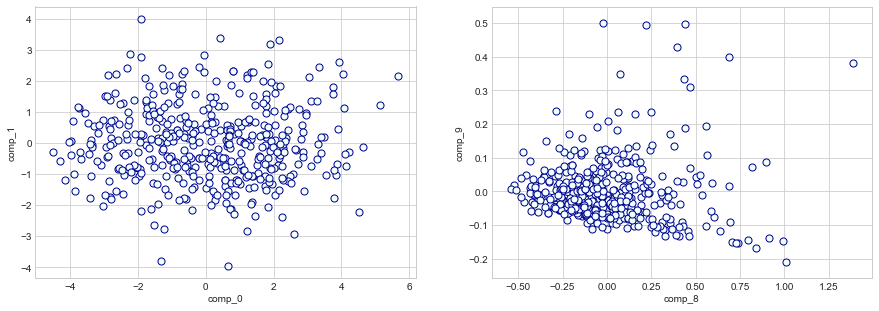

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas.plotting import scatter_matrix
pca = PCA()
Xc = pca.fit_transform(scale(X))

first_2 = sum(pca.explained_variance_ratio_[:2]*100)
last_2 = sum(pca.explained_variance_ratio_[-2:]*100)

print('variance by the components 1&2: %0.1f%%' % first_2)
print('variance by the last components: %0.1f%%' % last_2)

df = pd.DataFrame(Xc, columns=['comp_' + str(j) 
                               for j in range(10)])
fig, axes = plt.subplots(nrows=1, ncols=2, 
                         figsize=(15, 5))
first_two = df.plot.scatter(x='comp_0', y='comp_1', 
                            s=50, grid=True, c='Azure', 
                            edgecolors='DarkBlue', 
                            ax=axes[0])
last_two  = df.plot.scatter(x='comp_8', y='comp_9', 
                            s=50, grid=True, c='Azure', 
                            edgecolors='DarkBlue', 
                            ax=axes[1])

plt.show()

In [11]:
outlying = (Xc[:,-1] > 0.3) | (Xc[:,-2] > 1.0)
df[outlying]

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
58,-2.65,2.23,2.79,-0.63,0.26,-0.13,1.44,0.67,1.01,-0.21
110,-2.04,-0.76,0.74,-1.93,-0.07,0.24,-1.75,-0.41,0.47,0.31
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50
254,3.82,-1.03,1.06,0.44,0.27,0.86,0.97,0.66,0.43,0.33
322,4.52,-2.24,-0.14,0.85,-0.47,0.73,1.28,0.34,1.39,0.38
323,3.87,-0.69,0.26,-0.58,-0.97,0.76,1.79,0.36,0.69,0.40
353,0.98,1.61,-1.16,1.14,-0.36,1.46,2.53,0.90,-0.02,0.50
371,2.11,-0.28,0.64,-0.65,-0.36,-0.26,2.22,1.09,0.07,0.35
394,2.24,-1.13,0.51,1.54,-1.30,-0.12,2.28,-0.10,0.40,0.43


## Using cluster analysis

In [12]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=2.5, min_samples=25)
DB.fit(Xc)

from collections import Counter
print(Counter(DB.labels_))
df[DB.labels_==-1]

Counter({0: 414, -1: 28})


,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
15,2.95,0.95,-1.98,-0.79,1.77,-1.05,1.38,-0.88,0.35,-0.09
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
29,-0.36,-1.41,3.27,-0.67,0.05,0.97,0.96,1.10,-0.17,-0.03
35,-0.70,1.88,1.36,-1.58,0.02,1.12,-0.04,2.12,0.32,-0.11
78,-1.57,-1.29,-0.66,0.50,-1.64,-0.64,1.98,-0.23,-0.22,-0.09
117,3.49,0.19,1.29,0.46,-0.80,1.71,0.84,-1.77,0.09,0.04
123,5.67,2.16,-2.83,-0.98,0.43,0.22,-1.25,-0.85,0.70,-0.09
141,3.31,-0.02,-1.76,1.79,-0.94,1.92,-1.10,-0.77,0.64,-0.12
161,5.13,1.23,-1.13,0.32,1.91,0.54,-0.07,-0.15,0.00,0.08
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50


## Automating outliers detection with Isolation Forests

In [13]:
from sklearn.ensemble import IsolationForest
auto_detection = IsolationForest(max_samples=50, 
                                 contamination=0.05,
                                 random_state=0,
                                 behaviour='new')
auto_detection.fit(Xc)
evaluation = auto_detection.predict(Xc)
df[evaluation==-1]

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
11,0.40,-0.63,-1.95,-1.44,-0.48,-1.73,-1.54,-0.67,0.56,0.20
15,2.95,0.95,-1.98,-0.79,1.77,-1.05,1.38,-0.88,0.35,-0.09
23,3.77,-1.76,1.09,0.72,-0.64,1.90,0.56,1.09,0.44,0.50
32,2.61,-2.94,-0.39,0.64,-0.48,-1.15,-1.38,-0.07,0.99,-0.15
58,-2.65,2.23,2.79,-0.63,0.26,-0.13,1.44,0.67,1.01,-0.21
123,5.67,2.16,-2.83,-0.98,0.43,0.22,-1.25,-0.85,0.70,-0.09
141,3.31,-0.02,-1.76,1.79,-0.94,1.92,-1.10,-0.77,0.64,-0.12
152,3.29,-0.52,-1.09,-0.35,1.18,0.75,0.21,-1.27,0.46,-0.12
169,2.35,0.15,-0.13,1.19,-0.64,0.64,2.65,-0.31,0.22,0.50
202,3.03,2.11,0.25,-1.55,-0.14,-0.97,1.14,1.03,-0.34,0.15
